In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/automobileEDA.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

### Dự đoán giá (price) dựa vào highway-mpg

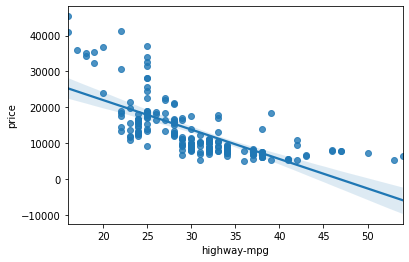

In [5]:
# plt.figure(figsize=(6,6))
sns.regplot(data=df, x='highway-mpg', y='price')
plt.show()

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


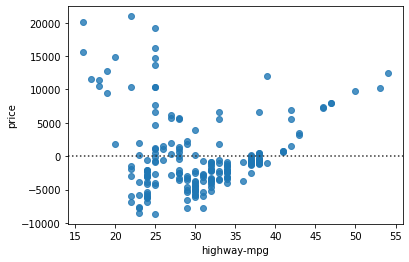

In [6]:
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [9]:
# import thư viện
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
X = df[['highway-mpg']]
y = df['price']

In [13]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # -> 80:20
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8) # -> 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2) # -> 80:20

In [14]:
X.shape, X_train.shape, X_test.shape

((201, 1), (160, 1), (41, 1))

In [15]:
# khởi tạo model
model = LinearRegression()

In [16]:
#huấn luyện model
model.fit(X_train, y_train)

LinearRegression()

In [17]:
yhat_train = model.predict(X_train)

In [18]:
yhat_train[0:5]

array([17633.16579297, 13620.45554363, 11212.82939403, 13620.45554363,
        6397.57709483])

In [19]:
y_train[0:5]

66     28176.0
26      8558.0
113    17950.0
168    17669.0
63     18344.0
Name: price, dtype: float64

In [20]:
yhat_test = model.predict(X_test)

In [21]:
yhat_test[0:5]

array([ 3187.40889536, 11212.82939403, 17633.16579297, 20040.79194257,
       18435.70784284])

In [22]:
y_test[0:5]

18      6295.0
170    10698.0
107    13860.0
98     13499.0
177    15750.0
Name: price, dtype: float64

In [23]:
a = model.intercept_

In [27]:
b = model.coef_[0]

In [28]:
a, b

(37696.71703964848, -802.5420498671572)

In [29]:
print('price = ', a, "+ (", b, 'x highway-mpg)')

price =  37696.71703964848 + ( -802.5420498671572 x highway-mpg)


In [30]:
# tính R^2
print('Full Dataset R-square:', model.score(X, y))
print('Train Dataset R-square:', model.score(X_train, y_train))
print('Test Dataset R-square:', model.score(X_test, y_test))

Full Dataset R-square: 0.4960187147974343
Train Dataset R-square: 0.4997481057145565
Test Dataset R-square: 0.47404252115394097


In [31]:
# tính MSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [32]:
print('Train Dataset MSE:', mean_squared_error(y_train, yhat_train))
print('Test Dataset MSE:', mean_squared_error(y_test, yhat_test))

Train Dataset MSE: 29574653.91541319
Test Dataset MSE: 39851951.677283406


In [33]:
print('Train Dataset MAE:', mean_absolute_error(y_train, yhat_train))
print('Test Dataset MAE:', mean_absolute_error(y_test, yhat_test))

Train Dataset MAE: 3851.955237967505
Test Dataset MAE: 4603.900303444943


In [34]:
# trực quan hóa kết quả

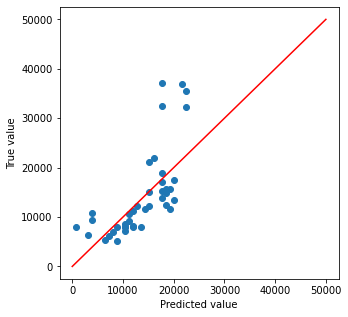

In [37]:
plt.figure(figsize=(5,5))
plt.scatter(yhat_test, y_test)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.plot([0, 50000], [0, 50000], 'k-', color='r')
plt.show()